In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


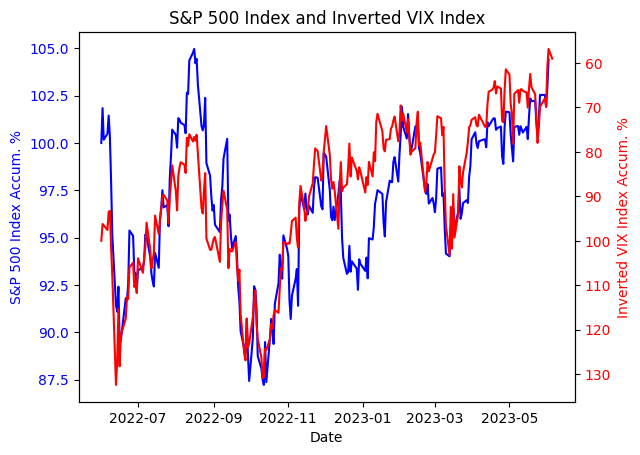

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

sp500 = yf.download("^GSPC", start="2022-06-01")
vix = yf.download("^VIX", start="2022-06-01")

# Invert the VIX Index data and calculate the accumulated movement percentage
vix["pct_change"] = vix["Adj Close"].pct_change().fillna(0)
vix["accum_pct"] = (1 + vix["pct_change"]).cumprod() * 100

# Calculate the S&P 500 Index accumulated movement percentage
sp500["pct_change"] = sp500["Adj Close"].pct_change().fillna(0)
sp500["accum_pct"] = (1 + sp500["pct_change"]).cumprod() * 100

# Plot the charts
fig, ax1 = plt.subplots()
ax1.plot(sp500.index, sp500["accum_pct"], color="blue")
ax2 = ax1.twinx()
ax2.plot(vix.index, vix["accum_pct"], color="red")
ax2.invert_yaxis() 
ax1.set_title("S&P 500 Index and Inverted VIX Index")
ax1.set_xlabel("Date")
ax1.set_ylabel("S&P 500 Index Accum. %", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax2.set_ylabel("Inverted VIX Index Accum. %", color="red")
ax2.tick_params(axis="y", labelcolor="red")
plt.show()